In [1]:
import sys
import gensim, logging
import networkx as nx
import matplotlib.pyplot as plt

Graph = nx.Graph()

In [2]:
if gensim.models.word2vec.FAST_VERSION == 1:
    print('Fast version installed')
else:
    print('Slow version installed')

Slow version installed


In [3]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [4]:
model = gensim.models.KeyedVectors.load_word2vec_format('ruwikiruscorpora_upos_cbow_300_20_2017.bin.gz', binary=True)
model.init_sims(replace=True)

2018-06-03 20:52:28,986 : INFO : loading projection weights from ruwikiruscorpora_upos_cbow_300_20_2017.bin.gz
2018-06-03 20:53:00,021 : INFO : loaded (392339, 300) matrix from ruwikiruscorpora_upos_cbow_300_20_2017.bin.gz
2018-06-03 20:53:00,022 : INFO : precomputing L2-norms of word weight vectors


In [5]:
semantic_field = ['россия_NOUN', 'государство_NOUN', 'отечество_NOUN', 'патриот_NOUN', 'человек_NOUN']

In [6]:
for word in semantic_field:
    if word in model:
        Graph.add_node(word)
        print(word)
        for _word in model.most_similar(positive=[word], topn=10):
            if _word[1] > 0.5:
                Graph.add_node(_word[0])
                Graph.add_edge(word, _word[0])
                print(_word[0], _word[1])
        print('\n')
    else:
        print(word + ' is not present in the model')

россия_NOUN
российский_ADJ 0.6027820706367493
страна_NOUN 0.5882930755615234
украина_NOUN 0.5621140003204346
государство_NOUN 0.5149040222167969


государство_NOUN
держава_NOUN 0.6813908815383911
страна_NOUN 0.6789070963859558
нация_NOUN 0.6180608868598938
власть_NOUN 0.6123276948928833
государственность_NOUN 0.60804283618927
правительство_NOUN 0.601047158241272
демократия_NOUN 0.5897690057754517
суверенитет_NOUN 0.5649380683898926
республика_NOUN 0.5539630651473999
монарх_NOUN 0.5504983067512512


отечество_NOUN
отчизна_NOUN 0.7106786966323853
великодушный_ADJ 0.612560510635376
венценосец_NOUN 0.6113904714584351
любовия_NOUN 0.5970613956451416
достохвальный_ADJ 0.5917432308197021
ревностия_NOUN 0.5891079306602478
долженствовать_VERB 0.5867810249328613
возвеличивать_VERB 0.5796510577201843
восприять_VERB 0.569991946220398
преставать_VERB 0.5693449974060059


патриот_NOUN
патриотизм_NOUN 0.624465823173523
государственник_NOUN 0.5928548574447632
националист_NOUN 0.5877241492271423
револю

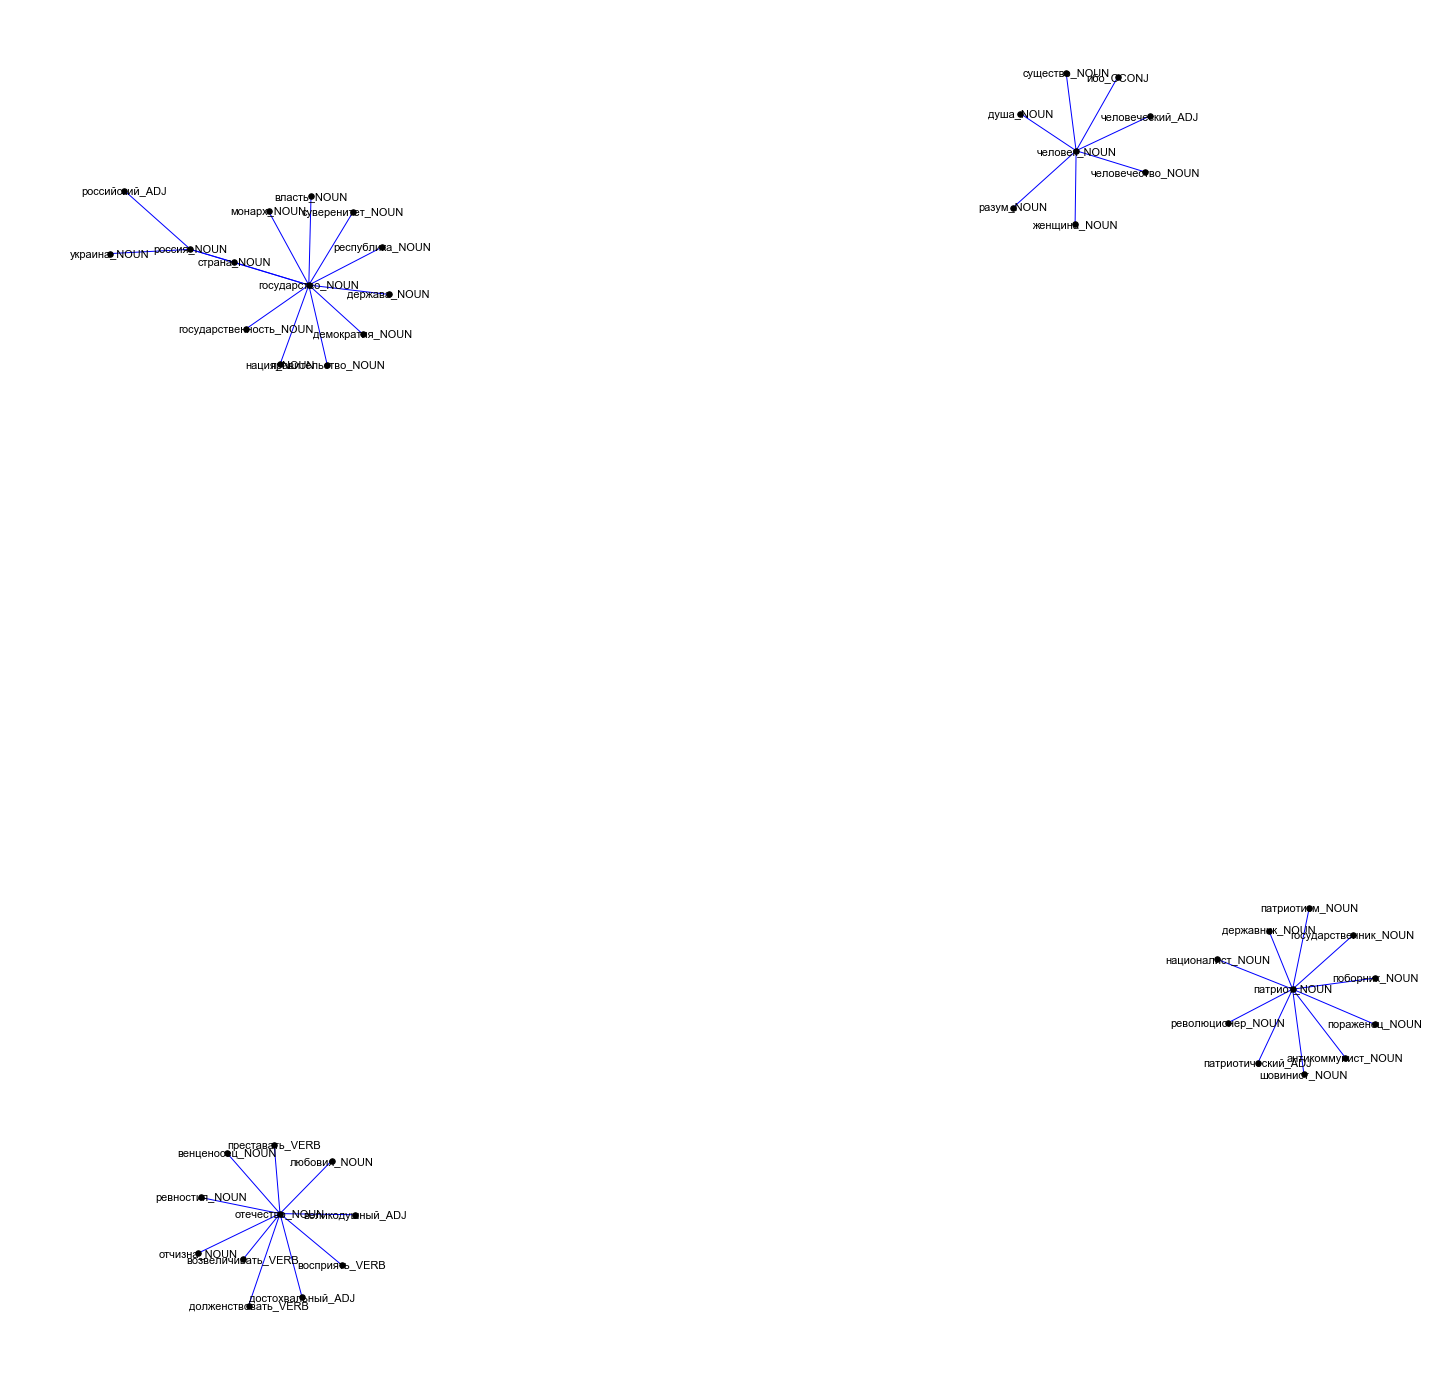

In [7]:
pos=nx.spring_layout(Graph)

plt.figure(figsize=(25, 25))
nx.draw_networkx_nodes(Graph, pos, node_color='black', node_size=30) 
nx.draw_networkx_edges(Graph, pos, edge_color='blue')
nx.draw_networkx_labels(Graph, pos, font_size=11, font_family='Arial')
plt.axis('off') 
plt.show()

In [8]:
deg = nx.degree_centrality(Graph)
degSorted = []
for nodename in sorted(deg, key=deg.get, reverse=True)[:7]:
    degSorted.append(nodename)
    print(nodename)

государство_NOUN
отечество_NOUN
патриот_NOUN
человек_NOUN
россия_NOUN
страна_NOUN
государственность_NOUN


In [9]:
connectivity_components = []
for component in nx.connected_component_subgraphs(Graph):
    if len(component.nodes()) > 1:
        connectivity_components.append(component)
len(connectivity_components)

4

In [10]:
for component in connectivity_components:
    _radius = nx.radius(component)
    _av_clust = nx.average_clustering(component)
    _node = component.nodes()
    print('Компонента связности:', _node)
    print('Коэффициент кластеризации:', _av_clust)
    print('Радиус:', _radius)
    print('\n')

Компонента связности: ['власть_NOUN', 'российский_ADJ', 'правительство_NOUN', 'страна_NOUN', 'украина_NOUN', 'суверенитет_NOUN', 'держава_NOUN', 'государственность_NOUN', 'республика_NOUN', 'демократия_NOUN', 'нация_NOUN', 'монарх_NOUN', 'россия_NOUN', 'государство_NOUN']
Коэффициент кластеризации: 0.08463203463203463
Радиус: 2


Компонента связности: ['венценосец_NOUN', 'достохвальный_ADJ', 'долженствовать_VERB', 'восприять_VERB', 'любовия_NOUN', 'ревностия_NOUN', 'возвеличивать_VERB', 'отчизна_NOUN', 'великодушный_ADJ', 'отечество_NOUN', 'преставать_VERB']
Коэффициент кластеризации: 0.0
Радиус: 1


Компонента связности: ['ибо_CCONJ', 'существо_NOUN', 'человеческий_ADJ', 'человечество_NOUN', 'разум_NOUN', 'человек_NOUN', 'женщина_NOUN', 'душа_NOUN']
Коэффициент кластеризации: 0.0
Радиус: 1


Компонента связности: ['шовинист_NOUN', 'антикоммунист_NOUN', 'революционер_NOUN', 'патриотический_ADJ', 'поборник_NOUN', 'пораженец_NOUN', 'державник_NOUN', 'патриот_NOUN', 'государственник_NOUN'